<a href="https://colab.research.google.com/github/ElenaKapetanoudi/Machine-Learning-Exercise-8/blob/main/Exercise_8_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import os
import numpy as np
import PIL.Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

# Part 1

## Question 1

### Archive Upload

Φορτώθηκε το archive.zip το οποίο περιέχει το Dog Breed Image Dataset

## Question 2

### Archive Unzip

In [2]:
!unzip archive.zip

Archive:  archive.zip
  inflating: dataset/Beagle/Beagle_1.jpg  
  inflating: dataset/Beagle/Beagle_10.jpg  
  inflating: dataset/Beagle/Beagle_100.jpg  
  inflating: dataset/Beagle/Beagle_11.jpg  
  inflating: dataset/Beagle/Beagle_12.jpg  
  inflating: dataset/Beagle/Beagle_13.jpg  
  inflating: dataset/Beagle/Beagle_14.jpg  
  inflating: dataset/Beagle/Beagle_15.jpg  
  inflating: dataset/Beagle/Beagle_16.jpg  
  inflating: dataset/Beagle/Beagle_17.jpg  
  inflating: dataset/Beagle/Beagle_18.jpg  
  inflating: dataset/Beagle/Beagle_19.jpg  
  inflating: dataset/Beagle/Beagle_2.jpg  
  inflating: dataset/Beagle/Beagle_20.jpg  
  inflating: dataset/Beagle/Beagle_21.jpg  
  inflating: dataset/Beagle/Beagle_22.jpg  
  inflating: dataset/Beagle/Beagle_23.jpg  
  inflating: dataset/Beagle/Beagle_24.jpg  
  inflating: dataset/Beagle/Beagle_25.jpg  
  inflating: dataset/Beagle/Beagle_26.jpg  
  inflating: dataset/Beagle/Beagle_27.jpg  
  inflating: dataset/Beagle/Beagle_28.jpg  
  inflating

## Question 3

### Load Class Names

In [3]:
class_names = sorted(os.listdir('dataset'))
class_ids = {label: i for i, label in enumerate(class_names)}
class_ids

{'Beagle': 0,
 'Boxer': 1,
 'Bulldog': 2,
 'Dachshund': 3,
 'German_Shepherd': 4,
 'Golden_Retriever': 5,
 'Labrador_Retriever': 6,
 'Poodle': 7,
 'Rottweiler': 8,
 'Yorkshire_Terrier': 9}

### Load & Preprocess Images

In [4]:
image_size = (64, 64)

inputs = []
targets = []
for label in class_names:
    for filename in os.listdir(f'dataset/{label}'):
        filepath = f'dataset/{label}/{filename}'
        img = PIL.Image.open(filepath).convert('RGB').resize(image_size)
        inputs.append(img)
        targets.append(class_ids[label])

### Numpy Arrays Creation

In [5]:
inputs = np.float32(inputs)
targets = np.int32(targets)

inputs.shape, targets.shape

((967, 64, 64, 3), (967,))

## Question 4

### Train & Test Sets Split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(
    inputs,
    targets,
    test_size=0.3,
    random_state=0
)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((676, 64, 64, 3), (676,), (291, 64, 64, 3), (291,))

### Preprocessing Dataset

In [7]:
x_train /= 255.0
x_test /= 255.0
y_train = np.eye(len(class_names))[y_train]
y_test = np.eye(len(class_names))[y_test]

y_train.shape, y_test.shape

((676, 10), (291, 10))

### MLP Creation

In [8]:
input_size = x_train.shape[1:]
output_size = len(class_names)

mlp = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_size),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=128, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=output_size, activation='softmax', use_bias=True)
], name='MLP')
mlp.summary()

Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,572,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,590,794 (6.07 MB)

 Trainable params: 1,590,794 (6.07 MB)

 Non-trainable params: 0 (0.00 B)

### Observation

Το προτεινόμενο μοντέλο είναι ένα MLP που δέχεται ως είσοδο εικόνες διαστάσεων 64×64×3. Αρχικά, το επίπεδο Flatten μετατρέπει την τρισδιάστατη εικόνα σε μονοδιάστατο διάνυσμα 12.288 χαρακτηριστικών. Στη συνέχεια ακολουθούν δύο πλήρως συνδεδεμένα (Dense) κρυφά επίπεδα με 128 νευρώνες το καθένα και συνάρτηση ενεργοποίησης ReLU, τα οποία μαθαίνουν μη γραμμικούς συνδυασμούς των χαρακτηριστικών εισόδου. Τέλος, το επίπεδο εξόδου είναι επίσης πλήρως συνδεδεμένο, έχει αριθμό νευρώνων ίσο με τον αριθμό των κλάσεων και χρησιμοποιεί τη συνάρτηση ενεργοποίησης Softmax, ώστε να παράγει πιθανότητες ταξινόμησης για κάθε κλάση.

## Question 5

### MLP Training

In [9]:
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
mlp.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])
batch_size = 32
epochs = 30

history = mlp.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.1135 - loss: 4.1851 - val_accuracy: 0.1753 - val_loss: 2.5790
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2006 - loss: 2.2730 - val_accuracy: 0.2440 - val_loss: 2.1984
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2841 - loss: 2.3273 - val_accuracy: 0.3333 - val_loss: 1.9732
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4306 - loss: 1.7612 - val_accuracy: 0.3368 - val_loss: 1.9760
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4549 - loss: 1.6948 - val_accuracy: 0.4880 - val_loss: 1.5724
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5843 - loss: 1.3134 - val_accuracy: 0.4021 - val_loss: 1.7317
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5108 - loss: 1.5314 - val_accuracy: 0.6667 - val_loss: 1.3305
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6948 - loss: 1.0293 - val_accuracy: 0.6048 - val_loss

## Question 6

### Loss History Plot

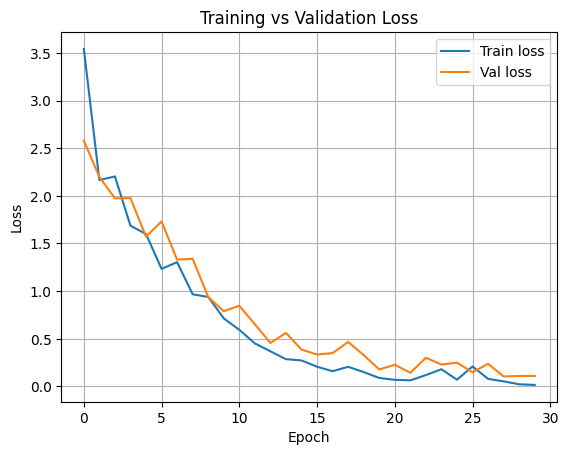

In [10]:
plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

### Accuracy History Plot

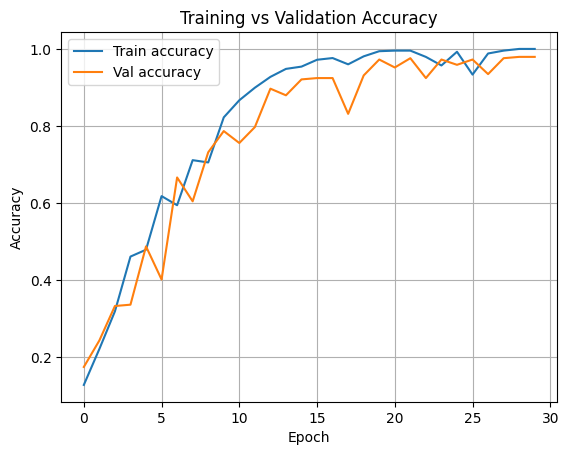

In [11]:
plt.figure()
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Question 7

### CNN Creation

In [12]:
cnn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_size),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, activation='relu', use_bias=True),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu', use_bias=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=output_size, activation='softmax', use_bias=True)
], name='CNN')
cnn.summary()

Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 31, 31, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 26912)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     3,444,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,456,298 (13.18 MB)

 Trainable params: 3,456,298 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

### CNN Training

In [13]:
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
cnn.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

history = cnn.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 158ms/step - accuracy: 0.1092 - loss: 2.7437 - val_accuracy: 0.1615 - val_loss: 2.2958
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2214 - loss: 2.2735 - val_accuracy: 0.3711 - val_loss: 2.0771
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3623 - loss: 1.9837 - val_accuracy: 0.5086 - val_loss: 1.7326
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6476 - loss: 1.2680 - val_accuracy: 0.7732 - val_loss: 0.8679
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8215 - loss: 0.7305 - val_accuracy: 0.8144 - val_loss: 0.6021
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9269 - loss: 0.2800 - val_accuracy: 0.9588 - val_loss: 0.2674
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9911 - loss: 0.0741 - val_accuracy: 0.9794 - val_loss: 0.1847
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9979 - loss: 0.0300 - val_accuracy: 0.9691 - val_los

### Lost History Plot

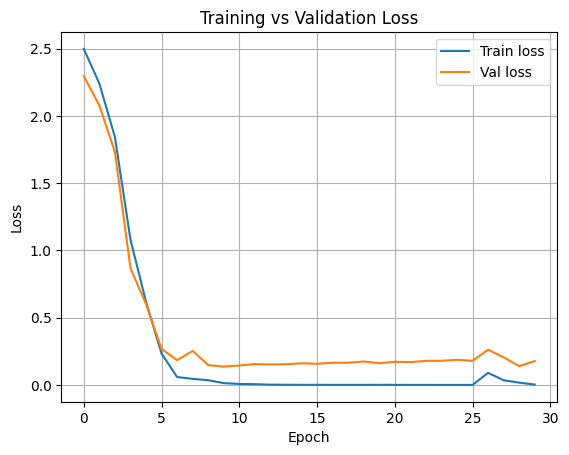

In [14]:
plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

### Accuracy History Plot

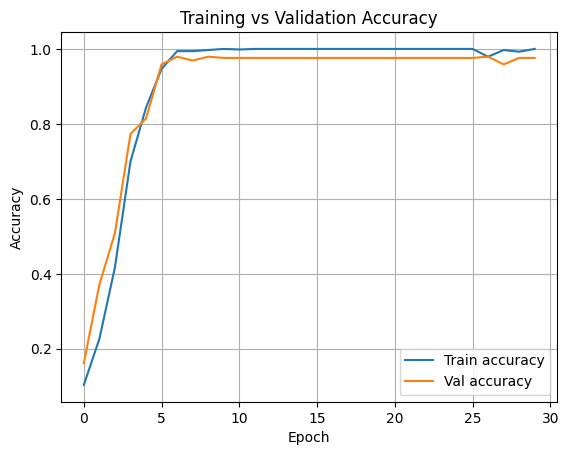

In [15]:
plt.figure()
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

### Observation

Παρατηρείται ότι το CNN παρουσιάζει καλύτερη απόδοση σε σχέση με το MLP ως προς την ακρίβεια και τη γενίκευση στο σύνολο ελέγχου. Αυτό οφείλεται στο γεγονός ότι το CNN αξιοποιεί την τοπική συσχέτιση των δεδομένων μέσω των συνελικτικών φίλτρων, μαθαίνοντας χαρακτηριστικά όπως ακμές, σχήματα και μοτίβα σε διαφορετικά επίπεδα αφαίρεσης. Επιπλέον, η χρήση κοινών βαρών μειώνει σημαντικά τον αριθμό των παραμέτρων σε σύγκριση με το MLP, περιορίζοντας τον κίνδυνο υπερπροσαρμογής. Αντίθετα, το MLP επεξεργάζεται την είσοδο ως ένα επίπεδο διάνυσμα, αγνοώντας τη χωρική δομή των δεδομένων, με αποτέλεσμα να απαιτεί περισσότερες παραμέτρους και να μαθαίνει λιγότερο αποδοτικές αναπαραστάσεις. Συνεπώς, το CNN επιτυγχάνει καλύτερη εξαγωγή χαρακτηριστικών και γενίκευση, γεγονός που το καθιστά πιο αποδοτικό μοντέλο για το συγκεκριμένο πρόβλημα.

## Question 8

### CNN With Batch Normalization

In [16]:
input_shape = x_train.shape[1:]
num_classes = y_train.shape[1]

cnn_bn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_shape),

    tf.keras.layers.Conv2D(32, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(num_classes, activation='softmax')
], name='CNN_with_BatchNorm')

cnn_bn.summary()

Model: "CNN_with_BatchNorm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,118,858 (8.08 MB)

 Trainable params: 2,118,410 (8.08 MB)

 Non-trainable params: 448 (1.75 KB)

### CNN Training

In [17]:
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
cnn_bn.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

history = cnn_bn.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 177ms/step - accuracy: 0.4680 - loss: 1.7756 - val_accuracy: 0.1237 - val_loss: 2.2289
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9695 - loss: 0.2573 - val_accuracy: 0.0825 - val_loss: 2.4908
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9996 - loss: 0.0785 - val_accuracy: 0.0825 - val_loss: 2.6174
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9995 - loss: 0.0501 - val_accuracy: 0.0825 - val_loss: 2.8679
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9988 - loss: 0.0487 - val_accuracy: 0.0825 - val_loss: 3.1538
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0370 - val_accuracy: 0.0825 - val_loss: 3.1767
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0202 - val_accuracy: 0.0825 - val_loss: 3.0529
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0175 - val_accuracy: 0.1134 - v

### Loss History Plot

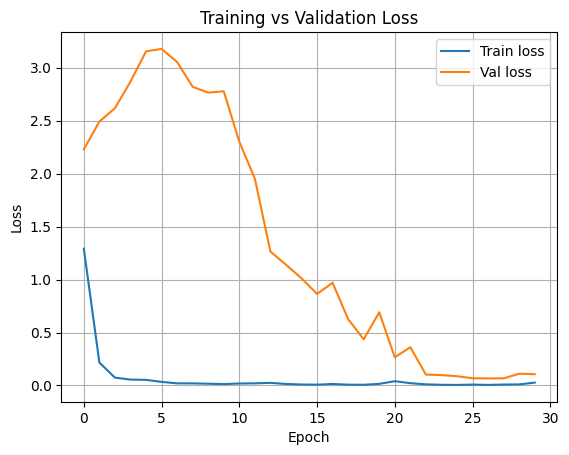

In [18]:
plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

### Accuracy History Plot

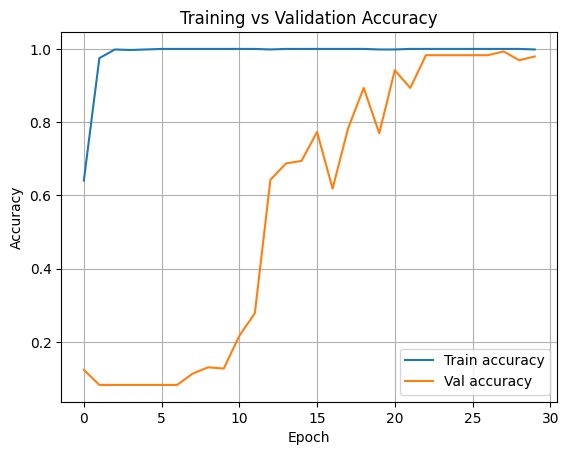

In [19]:
plt.figure()
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

### Observation

Tο CNN με Batch Normalization επιτυγχάνει άμεσα πολύ υψηλή ακρίβεια στο σύνολο εκπαίδευσης, αλλά η ακρίβεια στο validation αυξάνεται πιο αργά και με μεγαλύτερη αστάθεια, υποδηλώνοντας αρχική υπερπροσαρμογή. Παρ’ όλα αυτά, με την πρόοδο των epochs, το μοντέλο με Batch Normalization φτάνει σε παρόμοια τελική ακρίβεια, δείχνοντας ότι η Batch Normalization βελτιώνει τη σταθερότητα της εκπαίδευσης αλλά δεν οδηγεί απαραίτητα σε καλύτερη απόδοση για το συγκεκριμένο πρόβλημα και ρύθμιση υπερπαραμέτρων.